Laode Alif Ma'sum

This notebook can be accessed on: https://colab.research.google.com/drive/1W-wMcicC6jM-0P2CCbVXMHZUfN4snYwU?usp=sharing

The dataset can be accessed on: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

**Comparison of Multinomial Naive Bayes and Logistic Regression to Classify Real News and Fake News**

The goal of this project is to determine which classifier is the most suitable to classify real and fake news

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Data Preparation

On this stage, the datasets are loaded from 2 seperate csv file. The first one is containing real news and the second one is containing fake news. Each data in dataframe is labelled as Real or fake based on the source file. The last step is to concatenate two dataframes into one named "news_df".  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the datasets from CSV files
real_news_df = pd.read_csv("/content/drive/MyDrive/Dataset/News/True.csv")
fake_news_df = pd.read_csv("/content/drive/MyDrive/Dataset/News/Fake.csv")

# Add a new column to each dataframe indicating the news type
real_news_df['label'] = 'Real'
fake_news_df['label'] = 'fake'

# Concatenate the two dataframes into one
news_df = pd.concat([real_news_df, fake_news_df], ignore_index=True)

# Shuffle the rows in the combined dataframe to mix real and fake news
news_df = news_df.sample(frac=1).reset_index(drop=True)

# Save the combined dataframe to a new CSV file if needed
news_df.to_csv("combined_news.csv", index=False)

Bar chart to show the numbers of real and fake news from the dataset.

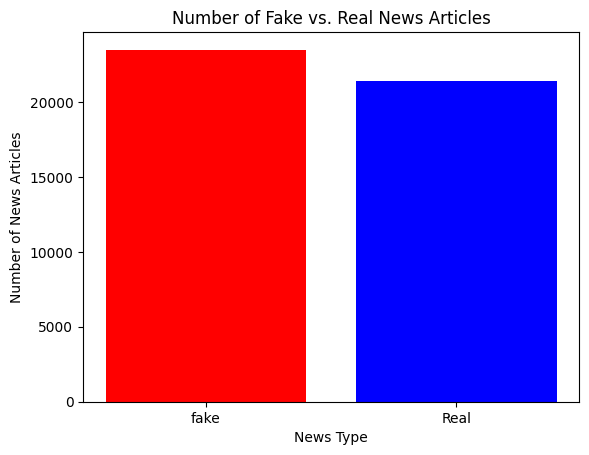

In [ ]:
# Count the number of fake and real news
news_counts = news_df['label'].value_counts()

# Create a bar chart
plt.bar(news_counts.index, news_counts.values, color=['red', 'blue'])

# Add labels and title
plt.xlabel('News Type')
plt.ylabel('Number of News Articles')
plt.title('Number of Fake vs. Real News Articles')

# Show the plot
plt.show()

Bar chart to show subject distribution of fake news

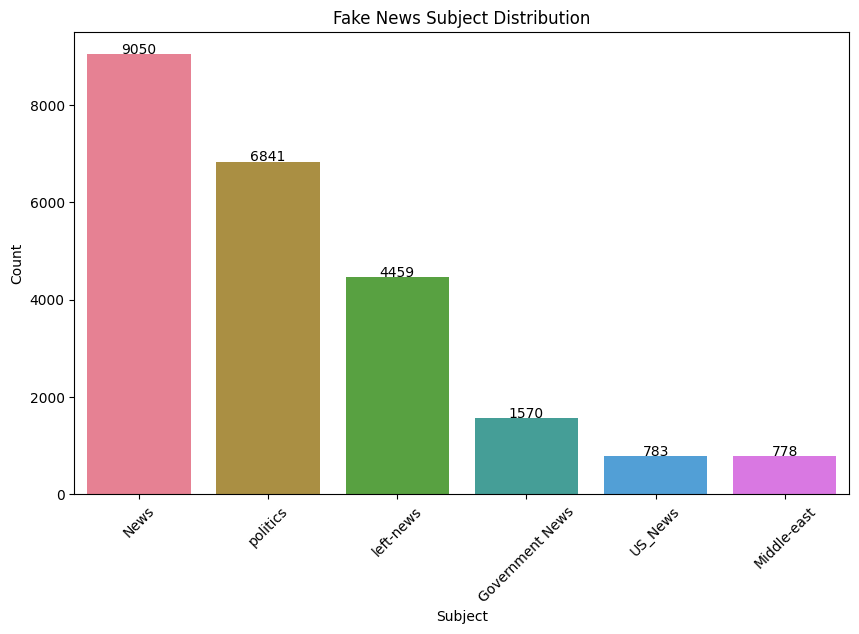

In [ ]:
subject_counts = fake_news_df['subject'].value_counts()

# Set a color palette for the bars
palette = sns.color_palette("husl", len(subject_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, hue=subject_counts.index, palette=palette, dodge=False)
plt.title('Fake News Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(subject_counts):
    plt.text(index, value + 10, str(value), ha='center')

plt.legend().remove()  # Remove legend
plt.show()


Bar chart to show subject distribution of real news

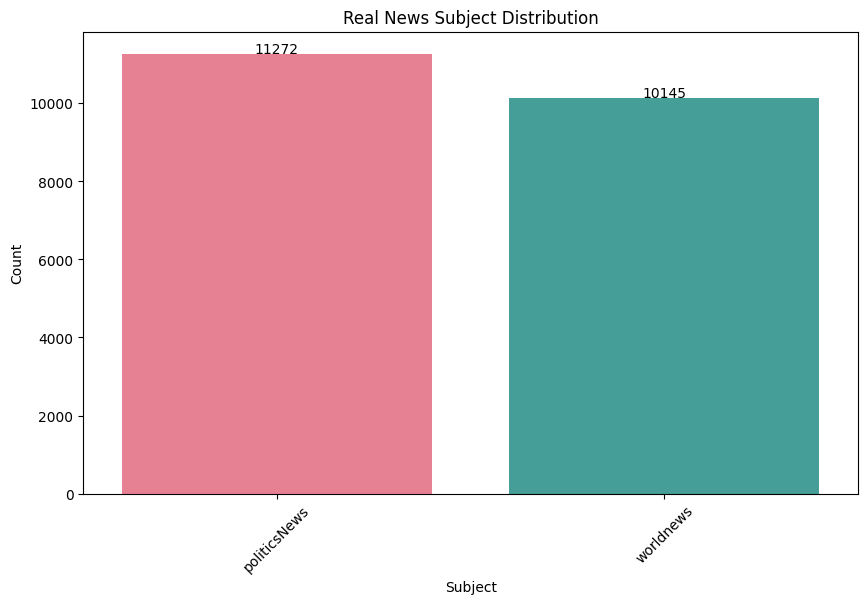

In [ ]:
subject_counts = real_news_df['subject'].value_counts()

# Set a color palette for the bars
palette = sns.color_palette("husl", len(subject_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, hue=subject_counts.index, palette=palette, dodge=False)
plt.title('Real News Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(subject_counts):
    plt.text(index, value + 10, str(value), ha='center')

plt.legend().remove()  # Remove legend
plt.show()

Generate word cloud for fake news title

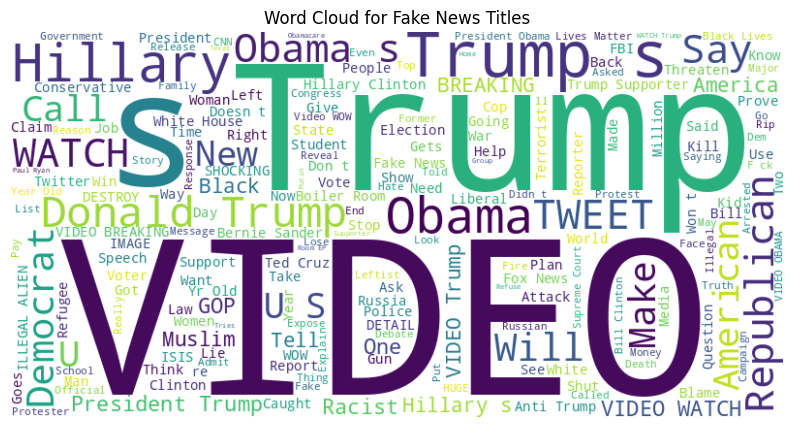

In [ ]:
fake_titles = ' '.join(fake_news_df['title'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Titles')
plt.axis('off')
plt.show()

Generate word cloud for real news titles

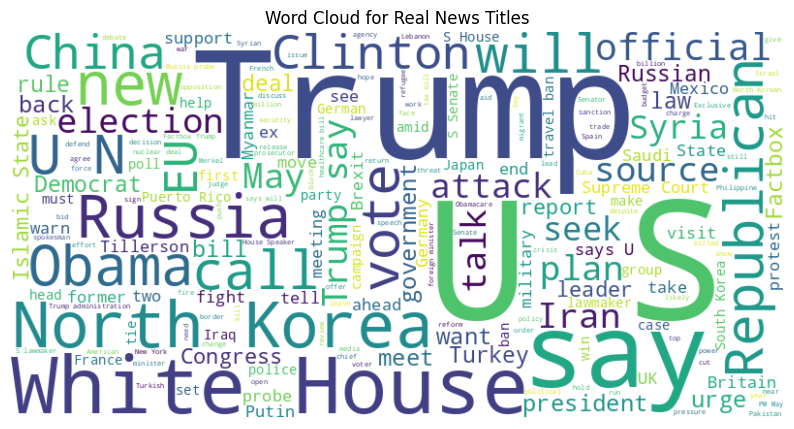

In [ ]:
real_titles = ' '.join(real_news_df['title'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News Titles')
plt.axis('off')
plt.show()

Checking if there is row that's containing null value in fake news dataframe

In [ ]:
fake_news_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Checking if there is row that's containing null value in real news dataframe

In [ ]:
real_news_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Print the shape of each dataframe. Since there are no rows containing null value, there is no need to drop any row in dataframe.

In [ ]:
print('Shape of Fake News:', fake_news_df.shape)
print('Shape of Real News:', real_news_df.shape)

Shape of Fake News: (23481, 5)
Shape of Real News: (21417, 5)


Print the first 5 rows of combined news dataframe

In [ ]:
print(news_df.head())

                                               title  \
0  Trump is 'very supportive' of Senate healthcar...   
1   Report: Russia Probe Gets EVEN HOTTER As Inve...   
2  GET OFF OUR CAMPUS! How Universities Plan To “...   
3  Exclusive: Trump administration considering se...   
4  EU-Canada trade deal is only model that fits B...   

                                                text       subject  \
0  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
1  Michael Cohen is a man who knows Donald Trump ...          News   
2  United States universities are obsessed with h...      politics   
3  WASHINGTON (Reuters) - Women and children cros...  politicsNews   
4  BRUSSELS (Reuters) - The future free trade agr...     worldnews   

                date label  
0     June 23, 2017   Real  
1       May 30, 2017  fake  
2       Apr 21, 2017  fake  
3     March 3, 2017   Real  
4  December 8, 2017   Real  


In [ ]:
print(news_df.describe())

                                                    title   text  \
count                                               44898  44898   
unique                                              38729  38646   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                   14    627   

             subject                date  label  
count          44898               44898  44898  
unique             8                2397      2  
top     politicsNews  December 20, 2017    fake  
freq           11272                 182  23481  


Seperate target and feature column and then split the dataset into training and testing sets.

The training sets is 80% and the test set is 20%

In [ ]:
# Splitting the data into features (X) and labels (y)
X = news_df[['title', 'text']]
y = news_df['label']  # Assuming 'label' is the column containing the class labels (real or fake)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Term frequency Inverse document frequency (TFIDF)**

Applying TFIDF Vectorizer on train and test dataset to extract raw document features into numerical format (TFI-DF Vector) using statistical measure.  


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["title"] + " " + X_train["text"])
X_test_tfidf = tfidf_vectorizer.transform(X_test["title"] + " " + X_test["text"])

# Multinomial Naive Bayes



Multinomial Naive Bayes model training

In [ ]:
mnb =  MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
print("Multinomial Naive Bayes Accuracy:")
# Predict labels for the training data
y_train_pred = mnb.predict(X_train_tfidf)

# Calculate the accuracy of the classifier on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the train accuracy
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

# Predict labels for the testing data
y_test_pred = mnb.predict(X_test_tfidf)
# Calculate the accuracy of the classifier on the training data
test_accuracy = accuracy_score(y_test, y_test_pred)
# Print the test accuracy
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Multinomial Naive Bayes Accuracy:
Train Accuracy: 94.60%
Test Accuracy: 94.20%


# Logistic Regression

Logistic Regression model training

In [ ]:
lr =  LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
print("Logistic Regression Accuracy:")
# Predict labels for the training data
y_train_pred = lr.predict(X_train_tfidf)

# Calculate the accuracy of the classifier on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the train accuracy
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

y_test_pred = lr.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Logistic Regression Accuracy:
Train Accuracy: 99.25%
Test Accuracy: 99.01%


Based on both the training and testing accuracy of two different classifiers, Multinomial Naive Bayes and Logistic Regression, it can be concluded that Logistic Regression is the better algorithm for classifying real and fake news, as it achieves a higher accuracy percentage.